In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt_kwargs = {'figsize': (10, 4)}
from IPython.display import HTML

In [135]:
roles = {"duelist": {"jett", "phoenix", "reyna", "raze", "yoru", "neon", "iso"},
             "initiator": {"sova", "breach", "skye", "kayo", "fade", "gekko"},
             "controller": {"brimstone", "omen", "viper", "astra", "harbor"},
             "sentinel": {"cypher", "sage", "killjoy", "chamber", "deadlock"}}
allagents = set()
for role, l in roles.items():
    allagents = allagents.union(set(l))

In [136]:
alpha = 5 #Eco rating parameters
beta = -5

In [137]:
#Rating for a round: winning with low credits earns more rating than winning with high credits, losing with more credits earns more negative rating.
def EcoRoundRating(LoadOutA, LoadoutB,  OutcomeA):
    LoadoutB = max(LoadoutB, 100)
    LoadOutA = max(LoadOutA, 100)
    if OutcomeA == 1:
        return alpha*LoadoutB/LoadOutA
    if OutcomeA == 0:
        return beta*LoadOutA/LoadoutB
    
def EcoRoundRating1(LoadOutA, LoadoutB, Eco_type_A, Eco_type_B,  OutcomeA):
    LoadoutB = max(LoadoutB, 100)
    LoadOutA = max(LoadOutA, 100)
    if Eco_type_A == Eco_type_B:
        if OutcomeA == 1:
            return alpha*LoadoutB/LoadOutA
        if OutcomeA == 0:
            return beta*LoadOutA/LoadoutB
    if Eco_type_A != Eco_type_B:
        if OutcomeA == 1:
            return LoadoutB/LoadOutA
        if OutcomeA == 0:
            return LoadOutA/LoadoutB
    

In [138]:
players_stats = pd.read_csv("../data/vct_2023/players_stats/players_stats.csv")
overview = pd.read_csv("../data/vct_2023/matches/overview.csv")
maps_scores = pd.read_csv("../data/vct_2023/matches/maps_scores.csv")
eco_rounds = pd.read_csv("../data/vct_2023/matches/eco_rounds.csv")

In [139]:
maps_scores["Team_A_win"] = maps_scores["Team A Score"] > maps_scores["Team B Score"]
maps_scores["Team_B_win"] = maps_scores["Team B Score"] > maps_scores["Team A Score"]

maps_scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score", "Team_B_win"]]

In [140]:
len(players_stats[players_stats["Rating"].isna()])

607

In [141]:
len(eco_rounds[eco_rounds["Loadout Value"].isna()])

0

In [142]:
players_stats = players_stats[['Tournament', 'Stage', 'Match Type', 'Player', 'Team', 'Agents', 'Rating']]

players_stats["Agents"] = players_stats["Agents"].apply(lambda x: x.replace(" ", ""))

#players_stats

Filling the none values in player rating with the average rating of the player/team.

In [143]:
players_stats = players_stats[players_stats.Agents.isin(allagents)]
grouped1 = players_stats.groupby(["Player", "Team", "Agents"])
players_stats.loc[:,"Rating"] = grouped1["Rating"].transform(lambda x: x.fillna(x.mean()))
grouped2 = players_stats.groupby(["Player", "Team"])
players_stats["Rating"] = grouped2["Rating"].transform(lambda x: x.fillna(x.mean()))
grouped3 = players_stats.groupby(["Team"])
players_stats["Rating"] = grouped3["Rating"].transform(lambda x: x.fillna(x.mean()))
players_stats.Rating.isna().sum()
players_stats = players_stats[~players_stats.Rating.isna()]
players_stats.sort_values(by=["Rating"], ascending=False).head(20)

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
3264,Champions Tour 2023: EMEA League,Regular Season,Week 2,Jamppi,Team Liquid,skye,2.29
3180,Champions Tour 2023: EMEA League,Regular Season,Week 1,Sayf,Team Liquid,raze,2.25
7707,Champions Tour 2023: Pacific League,League Play,Week 3,xffero,Rex Regum Qeon,sova,2.10
531,Champions Tour 2023: Pacific Last Chance Quali...,Main Event,Lower Final,invy,Team Secret,kayo,2.08
3314,Champions Tour 2023: EMEA League,Regular Season,Week 3,Shao,Natus Vincere,fade,2.04
9355,Champions Tour 2023: Champions China Qualifier,Preliminary Stage,Round 1,Septem7,Shenzhen NTER,killjoy,1.98
6704,Champions Tour 2023: Americas League,Regular Season,Week 7,Victor,NRG Esports,raze,1.97
141,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Final,NagZ,KRÜ Esports,viper,1.96
6126,Champions Tour 2023: Americas League,Regular Season,Week 2,s0m,NRG Esports,viper,1.96
7238,Champions Tour 2023: Pacific League,Playoffs,Upper Semifinals,BuZz,DRX,raze,1.95


Another file which has player rating

In [144]:
overview.sort_values(by=["Rating"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating,Average Combat Score,...,Deaths,Assists,Kills - Deaths (KD),"Kill, Assist, Trade, Survive %",Average Damage per Round,Headshot %,First Kills,First Deaths,Kills - Deaths (FKD),Side
7211,Champions Tour 2023: Champions China Qualifier,Preliminary Stage,Round 1,Shenzhen NTER vs Kingzone,Lotus,Spring,Shenzhen NTER,raze,3.53,686.0,...,0.0,1.0,5.0,100%,408.0,45%,1.0,0.0,1.0,defend
22216,Champions Tour 2023: EMEA League,Regular Season,Week 3,Team Vitality vs Karmine Corp,Ascent,Destrian,Team Vitality,omen,3.48,545.0,...,0.0,1.0,8.0,100%,356.0,38%,0.0,0.0,0.0,attack
27698,Champions Tour 2023: Pacific League,League Play,Week 4,T1 vs Gen.G,Haven,k1Ng,Gen.G,killjoy,3.42,593.0,...,0.0,4.0,13.0,100%,359.0,30%,2.0,0.0,2.0,defend
6311,Champions Tour 2023: Pacific Last Chance Quali...,Main Event,Lower Final,Team Secret vs Gen.G,Ascent,invy,Team Secret,kayo,3.16,566.0,...,1.0,4.0,6.0,100%,400.0,42%,0.0,0.0,0.0,defend
9101,Champions Tour 2023: Champions China Qualifier,Preliminary Stage,Round 4,Four Angry Men vs Invincible Gaming,Lotus,Lumo,Four Angry Men,skye,3.15,601.0,...,0.0,0.0,8.0,100%,325.0,30%,1.0,0.0,1.0,defend


In this file, overview "rating" and "acs:average combat score" look off.  As in 2023, we will use rating data from players_stats file.

In [145]:
ind1 = overview["Side"] == "both"
ind2 = overview["Map"] != "All Maps"
ind = ind1 & ind2

overview = overview[ind]
overview = overview[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Player',
       'Team', 'Agents']]
overview

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,nAts,Team Liquid,viper
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Sayf,Team Liquid,breach
6,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,soulcas,Team Liquid,astra
9,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Jamppi,Team Liquid,neon
12,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Redgar,Team Liquid,sova
...,...,...,...,...,...,...,...,...
34929,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Derke,FNATIC,jett
34932,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Boaster,FNATIC,viper
34935,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Alfajer,FNATIC,killjoy
34938,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Leo,FNATIC,sova


In [146]:
rating_df = overview.merge(players_stats, on=['Tournament', 'Stage', 'Match Type', 'Player', "Agents", "Team"], how="left")

rating_df

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,nAts,Team Liquid,viper,1.26
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Sayf,Team Liquid,breach,0.96
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,soulcas,Team Liquid,astra,0.95
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Jamppi,Team Liquid,neon,0.89
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Redgar,Team Liquid,sova,0.69
...,...,...,...,...,...,...,...,...,...
8295,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Derke,FNATIC,jett,1.10
8296,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Boaster,FNATIC,viper,0.95
8297,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Alfajer,FNATIC,killjoy,0.96
8298,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Leo,FNATIC,sova,NaN


In [147]:
# I will just fill NaN with the average of team rating.
grouped4 = rating_df.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"])
rating_df["Rating"] = grouped4["Rating"].transform(lambda x: x.fillna(x.mean()))

# After first step I found there are still missing values.  Fill them with each individual player's average throughout this data.
grouped5 = rating_df.groupby(["Player"])
rating_df["Rating"] = grouped5["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df["Rating"] = rating_df.groupby(["Team"])["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df = rating_df[~rating_df.Rating.isna()]
rating_df.Rating.isna().sum()

0

In [148]:
grouped_rating_df = rating_df.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team'])["Rating"].agg("sum").reset_index()

grouped_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team,Rating
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,KRÜ Esports,5.580
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,Leviatán,4.650
2,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Lotus,KRÜ Esports,5.190
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Lotus,Leviatán,4.625
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Pearl,KRÜ Esports,5.270
...,...,...,...,...,...,...,...
1655,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Lotus,Paper Rex,4.410
1656,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Pearl,LOUD,5.940
1657,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Pearl,Paper Rex,4.975
1658,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Split,LOUD,5.810


Following is one of the main data frame. It has team rating based on player rating.

In [149]:
final_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team A", "Rating":"Team_A_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team B", "Rating":"Team_B_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

print(len(final_rating_df))

final_rating_df = final_rating_df[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A', 'Team_A_win', 'Team_B_win', 'Team B', 'Team_A_rating', 'Team_B_rating']]

print(final_rating_df.isna().sum())

final_rating_df = final_rating_df.dropna()

print(len(final_rating_df))
final_rating_df

830
Tournament       0
Stage            0
Match Type       0
Match Name       0
Map              0
Team A           0
Team_A_win       0
Team_B_win       0
Team B           0
Team_A_rating    0
Team_B_rating    0
dtype: int64
830


,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_B_rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,False,True,Natus Vincere,4.750000,5.1900
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,False,True,Natus Vincere,4.937500,5.2250
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,False,True,LOUD,5.240000,5.5300
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,True,False,LOUD,4.970000,4.7700
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,True,False,LOUD,4.850000,4.9400
...,...,...,...,...,...,...,...,...,...,...,...
825,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Ascent,LOUD,False,True,FNATIC,5.250000,5.1000
826,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Fracture,LOUD,False,True,FNATIC,4.610000,4.7625
827,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Split,LOUD,True,False,FNATIC,4.812500,4.8000
828,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Lotus,LOUD,True,False,FNATIC,5.250000,4.8250


Next, we will work the economy data

In [150]:
eco_rounds["Outcome"] = eco_rounds["Outcome"].apply(lambda x: 1 if x == "Win" else 0)
eco_rounds["Loadout Value"] = eco_rounds["Loadout Value"].apply(lambda x: int(x.replace(".","").replace("k","00")))
eco_rounds["Remaining Credits"] = eco_rounds["Remaining Credits"].apply(lambda x: int(x.replace(".","").replace("k","00")))

half_eco_rounds = eco_rounds.loc[ (eco_rounds["Round Number"]<13)]
eco_rounds.head(10)

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,1,Team Liquid,3600,400,Eco: 0-5k,1
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,1,Natus Vincere,3500,300,Eco: 0-5k,0
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,2,Team Liquid,15600,4100,Semi-buy: 10-20k,1
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,2,Natus Vincere,4200,6400,Eco: 0-5k,0
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,3,Team Liquid,13300,14800,Semi-buy: 10-20k,1
5,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,3,Natus Vincere,18200,300,Semi-buy: 10-20k,0
6,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,4,Team Liquid,21400,18100,Full buy: 20k+,1
7,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,4,Natus Vincere,7400,8900,Semi-eco: 5-10k,0
8,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,5,Team Liquid,23600,29400,Full buy: 20k+,0
9,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,5,Natus Vincere,20300,4300,Full buy: 20k+,1


In [151]:
team_ab_2022 = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team B"]]

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Natus Vincere
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,Natus Vincere
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,LOUD
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,LOUD
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,LOUD
...,...,...,...,...,...,...,...
825,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Ascent,LOUD,FNATIC
826,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Fracture,LOUD,FNATIC
827,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Split,LOUD,FNATIC
828,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Lotus,LOUD,FNATIC


In [152]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team']

Eco_rounds_ab_2022=\
pd.merge(
    team_ab_2022.rename(columns={"Team A":"Team"})\
    ,eco_rounds\
    ,on=keys
)\
.rename(columns={"Loadout Value":"Loadout_A", "Remaining Credits":"Remaining_credit_A", "Type":"Eco_type_A", "Outcome":"Outcome_A"})\
.rename(columns={"Team":"Team A", "Team B":"Team"})\
.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
.join(eco_rounds\
      .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
)\
.reset_index()\
.rename(columns={"Loadout Value":"Loadout_B", "Remaining Credits":"Remaining_credit_B", "Type":"Eco_type_B", "Outcome":"Outcome_B"})\
.rename(columns={"Team":"Team B"})

#Eco_rounds_ab_2022.head()

In [153]:
Eco_rounds_ab_2022[[ "Eco_type_A", "Eco_type_B", "Outcome_A", "Round Number"]].groupby([ "Eco_type_A", "Eco_type_B", "Outcome_A"]).count()

Round Number
Eco_type_A       Eco_type_B       Outcome_A              
Eco: 0-5k        Eco: 0-5k        0                   767
                                  1                   786
                 Full buy: 20k+   0                    69
                                  1                     7
                 Semi-buy: 10-20k 0                   605
                                  1                    75
Full buy: 20k+   Eco: 0-5k        0                     6
                                  1                    78
                 Full buy: 20k+   0                  2824
                                  1                  2795
                 Semi-buy: 10-20k 0                  1036
                                  1                  1645
                 Semi-eco: 5-10k  0                   167
                                  1                   655
Semi-buy: 10-20k Eco: 0-5k        0                    68
                                  1                   618
                 Full buy: 20k+   0                  1545
                                  1                  1070
                 Semi-buy: 10-20k 0                   380
                                  1                   373
                 Semi-eco: 5-10k  0                    19
                                  1                    90
Semi-eco: 5-10k  Full buy: 20k+   0                   560
                                  1                   172
                 Semi-buy: 10-20k 0                    84
                                  1                    22

In [154]:
Eco_rounds_ab_2022["Eco_Round_Rating_A"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_A"]]\
    .apply(lambda row: EcoRoundRating(row["Loadout_A"], row["Loadout_B"], row["Outcome_A"]), axis=1)

Eco_rounds_ab_2022["Eco_Round_Rating_B"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_B"]]\
    .apply(lambda row: EcoRoundRating(row["Loadout_B"], row["Loadout_A"], row["Outcome_B"]), axis=1)


Eco_rounds_ab_2022.head(10)

# RoundRating2
Eco_rounds_ab_2022["Eco_Round_Rating_A"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_A", "Eco_type_A", "Eco_type_B"]]\
    .apply(lambda row: EcoRoundRating1(row["Loadout_A"],  row["Loadout_B"],row["Eco_type_A"], row["Eco_type_B"], row["Outcome_A"]), axis=1)

Eco_rounds_ab_2022["Eco_Round_Rating_B"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_B",  "Eco_type_A", "Eco_type_B"]]\
    .apply(lambda row: EcoRoundRating1(row["Loadout_B"], row["Loadout_A"], row["Eco_type_A"], row["Eco_type_B"], row["Outcome_B"]), axis=1)


Eco_rounds_ab_2022.head(10)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Eco_Round_Rating_A,Eco_Round_Rating_B
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,1,Team Liquid,3600,400,Eco: 0-5k,1,3500,300,Eco: 0-5k,0,4.861111,-4.861111
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,2,Team Liquid,15600,4100,Semi-buy: 10-20k,1,4200,6400,Eco: 0-5k,0,0.269231,0.269231
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,3,Team Liquid,13300,14800,Semi-buy: 10-20k,1,18200,300,Semi-buy: 10-20k,0,6.842105,-6.842105
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,4,Team Liquid,21400,18100,Full buy: 20k+,1,7400,8900,Semi-eco: 5-10k,0,0.345794,0.345794
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,5,Team Liquid,23600,29400,Full buy: 20k+,0,20300,4300,Full buy: 20k+,1,-5.812808,5.812808
5,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,6,Team Liquid,22200,17400,Full buy: 20k+,1,21300,12100,Full buy: 20k+,0,4.797297,-4.797297
6,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,7,Team Liquid,22000,16400,Full buy: 20k+,0,19700,5100,Semi-buy: 10-20k,1,1.116751,1.116751
7,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,8,Team Liquid,19800,9400,Semi-buy: 10-20k,0,19700,8200,Semi-buy: 10-20k,1,-5.025381,5.025381
8,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,9,Team Liquid,19000,3700,Semi-buy: 10-20k,0,21100,13900,Full buy: 20k+,1,0.900474,0.900474
9,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,10,Team Liquid,19000,4200,Semi-buy: 10-20k,1,22900,21700,Full buy: 20k+,0,1.205263,1.205263


In [155]:
Half_Eco_rounds_ab_2022 = Eco_rounds_ab_2022.loc[Eco_rounds_ab_2022["Round Number"]<13]
#Half_Eco_rounds_ab_2022

Rating for a match is average of the round rating.

In [156]:
grouped_eco_rating_df_A = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])["Eco_Round_Rating_A"].agg("mean").reset_index()
grouped_eco_rating_df_B = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])["Eco_Round_Rating_B"].agg("mean").reset_index()


In [157]:
half_grouped_eco_rating_df_A = Half_Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])["Eco_Round_Rating_A"].agg("mean").reset_index()
half_grouped_eco_rating_df_B = Half_Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])["Eco_Round_Rating_B"].agg("mean").reset_index()

In [158]:
final_eco_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_eco_rating_df_A\
                        .rename(columns={"Eco_Round_Rating_A":"Team_A_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_eco_rating_df_B\
                        .rename(columns={"Eco_Round_Rating_B":"Team_B_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

In [159]:
final_eco_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_eco_rating,Team_B_eco_rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,Team Liquid,11,False,13,True,0.037844,0.434140
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Natus Vincere,Team Liquid,15,False,17,True,0.333313,0.482092
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,LOUD,DRX,13,False,15,True,-0.369549,1.216406
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,LOUD,DRX,13,True,6,False,1.985130,-0.128244
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,LOUD,DRX,13,True,8,False,1.527782,-0.189404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Ascent,FNATIC,LOUD,8,False,13,True,0.364659,0.366368
826,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Fracture,FNATIC,LOUD,7,False,13,True,-0.368578,1.654921
827,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Split,FNATIC,LOUD,13,True,9,False,1.941561,-0.695286
828,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Lotus,FNATIC,LOUD,13,True,8,False,0.429858,0.767256


In [160]:
final_rating_df.columns

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team_A_win', 'Team_B_win', 'Team B', 'Team_A_rating', 'Team_B_rating'],
      dtype='object')

In [161]:
final_eco_rating_df = final_eco_rating_df[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team B', 'Team_A_win', 'Team_B_win',
       'Team_A_eco_rating', 'Team_B_eco_rating']]

In [162]:
final_eco_rating_df.columns

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team B', 'Team_A_win', 'Team_B_win', 'Team_A_eco_rating',
       'Team_B_eco_rating'],
      dtype='object')

In [163]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team B', 'Team_A_win', 'Team_B_win']

final_df=\
pd.merge(
    final_rating_df, final_eco_rating_df,on=keys
)

final_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_B_rating,Team_A_eco_rating,Team_B_eco_rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,False,True,Natus Vincere,4.750000,5.1900,0.037844,0.434140
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,False,True,Natus Vincere,4.937500,5.2250,0.333313,0.482092
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,False,True,LOUD,5.240000,5.5300,-0.369549,1.216406
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,True,False,LOUD,4.970000,4.7700,1.985130,-0.128244
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,True,False,LOUD,4.850000,4.9400,1.527782,-0.189404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Ascent,LOUD,False,True,FNATIC,5.250000,5.1000,0.364659,0.366368
826,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Fracture,LOUD,False,True,FNATIC,4.610000,4.7625,-0.368578,1.654921
827,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Split,LOUD,True,False,FNATIC,4.812500,4.8000,1.941561,-0.695286
828,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Lotus,LOUD,True,False,FNATIC,5.250000,4.8250,0.429858,0.767256


In [164]:
half_final_eco_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(half_grouped_eco_rating_df_A\
                        .rename(columns={"Round_Rating_A":"Team_A_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(half_grouped_eco_rating_df_B\
                        .rename(columns={"Round_Rating_B":"Team_B_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

In [165]:
final_eco_rating_df=final_eco_rating_df.dropna()
half_final_eco_rating_df=half_final_eco_rating_df.dropna()

We will train on pre Valorant Champions and test on the championship

In [166]:
final_df_train = final_df.loc[final_df["Tournament"]!= "Valorant Champions 2023"]
final_df_test  = final_df.loc[final_df["Tournament"]== "Valorant Champions 2023"]
final_df_test = final_df_test[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team_A_win', 'Team_B_win', 'Team B']]


In [167]:
final_rating_df_A_from_before = final_df_train.groupby(['Team A'])["Team_A_rating"].agg("mean").reset_index()
final_rating_df_B_from_before = final_df_train.groupby(['Team B'])["Team_B_rating"].agg("mean").reset_index()
final_eco_rating_df_A_from_before = final_df_train.groupby(['Team A'])["Team_A_eco_rating"].agg("mean").reset_index()
final_eco_rating_df_B_from_before = final_df_train.groupby(['Team B'])["Team_B_eco_rating"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(final_rating_df_A_from_before.head(20))

                    Team A  Team_A_rating
0              100 Thieves       4.510000
1   Attacking Soul Esports       4.623978
2              BBL Esports       4.978542
3          Bilibili Gaming       4.801876
4                   Cloud9       5.112643
5                      DRX       5.186420
6       DetonatioN FocusMe       3.515000
7             Douyu Gaming       4.878750
8     Dragon Ranger Gaming       5.034792
9            EDward Gaming       5.266145
10           Evil Geniuses       5.147589
11                  FNATIC       5.755863
12                   FURIA       4.527500
13             FUT Esports       4.942917
14          Four Angry Men       5.523333
15         FunPlus Phoenix       4.474923
16             Gank Gaming       5.119063
17                   Gen.G       4.967955
18           Giants Gaming       5.416029
19          Global Esports       5.511250


In [168]:
final_df_test = final_df_test.merge(final_rating_df_A_from_before, on=["Team A"], how="left")
final_df_test = final_df_test.merge(final_eco_rating_df_A_from_before, on=["Team A"], how="left")
final_df_test

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_A_eco_rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,False,True,Natus Vincere,5.094487,0.612073
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,False,True,Natus Vincere,5.094487,0.612073
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,False,True,LOUD,5.186420,0.497939
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,True,False,LOUD,5.186420,0.497939
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,True,False,LOUD,5.186420,0.497939
...,...,...,...,...,...,...,...,...,...,...,...
79,Valorant Champions 2023,Playoffs,Lower Final,Evil Geniuses vs LOUD,Bind,Evil Geniuses,True,False,LOUD,5.147589,0.572518
80,Valorant Champions 2023,Playoffs,Grand Final,Paper Rex vs Evil Geniuses,Split,Paper Rex,False,True,Evil Geniuses,5.274891,0.569265
81,Valorant Champions 2023,Playoffs,Grand Final,Paper Rex vs Evil Geniuses,Ascent,Paper Rex,True,False,Evil Geniuses,5.274891,0.569265
82,Valorant Champions 2023,Playoffs,Grand Final,Paper Rex vs Evil Geniuses,Bind,Paper Rex,False,True,Evil Geniuses,5.274891,0.569265


In [169]:
final_df_test = final_df_test.merge(final_rating_df_B_from_before, on=["Team B"], how="left")
final_df_test = final_df_test.merge(final_eco_rating_df_B_from_before, on=["Team B"], how="left")
#champs_rating_overall_df.isna().sum()
print(len(final_df_test))
final_df_test = final_df_test.dropna()
final_df_train = final_df_train.dropna()
final_df_test


84


,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_A_eco_rating,Team_B_rating,Team_B_eco_rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,False,True,Natus Vincere,5.094487,0.612073,5.195781,0.688726
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,False,True,Natus Vincere,5.094487,0.612073,5.195781,0.688726
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,False,True,LOUD,5.186420,0.497939,5.194363,0.462695
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,True,False,LOUD,5.186420,0.497939,5.194363,0.462695
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,True,False,LOUD,5.186420,0.497939,5.194363,0.462695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Valorant Champions 2023,Playoffs,Lower Final,Evil Geniuses vs LOUD,Bind,Evil Geniuses,True,False,LOUD,5.147589,0.572518,5.194363,0.462695
80,Valorant Champions 2023,Playoffs,Grand Final,Paper Rex vs Evil Geniuses,Split,Paper Rex,False,True,Evil Geniuses,5.274891,0.569265,5.261034,0.768374
81,Valorant Champions 2023,Playoffs,Grand Final,Paper Rex vs Evil Geniuses,Ascent,Paper Rex,True,False,Evil Geniuses,5.274891,0.569265,5.261034,0.768374
82,Valorant Champions 2023,Playoffs,Grand Final,Paper Rex vs Evil Geniuses,Bind,Paper Rex,False,True,Evil Geniuses,5.274891,0.569265,5.261034,0.768374


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Logistic Regression on Team_A_Rating and Team_B_Rating

In [171]:
lr1 = LogisticRegression()
X1_train = final_df_train[["Team_A_rating", "Team_B_rating"]]
y1_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X1_test = final_df_test[["Team_A_rating", "Team_B_rating"]]
y1_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)


In [172]:
print(len(X1_train), len(y1_train), len(X1_test), len(y1_test))

688 688 71 71


In [173]:
lr1.fit(X1_train, y1_train)
pred1 = lr1.predict(X1_test)
acc1 = accuracy_score(y1_test, pred1)
print("mean of true values:", np.mean(y1_test))
print("mean of prediction:", np.mean(pred1))
print("Accuracy:", acc1)
lr1.coef_

mean of true values: 0.5211267605633803
mean of prediction: 0.28169014084507044
Accuracy: 0.6197183098591549


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.06798057, -2.71982555]])

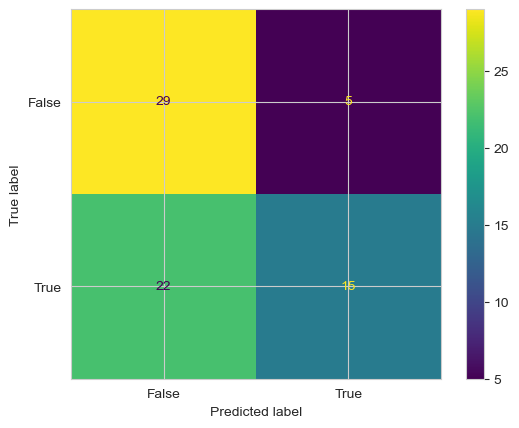

In [174]:
cm1 = confusion_matrix(y1_test, pred1, labels=lr1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=lr1.classes_)
disp1.plot()
plt.show()

Logistic Regression on Team_A_Eco_Rating and Team_B_Eco_Rating

In [175]:
lr2 = LogisticRegression()
X2_train = final_df_train[["Team_A_eco_rating", "Team_B_eco_rating"]]
y2_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X2_test = final_df_test[["Team_A_eco_rating", "Team_B_eco_rating"]]
y2_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)

In [176]:
print(len(X2_train), len(y2_train), len(X2_test), len(y2_test))

688 688 71 71


In [177]:
lr2.fit(X2_train, y2_train)
pred2 = lr2.predict(X2_test)
acc2 = accuracy_score(y2_test, pred2)
print("mean of true values:", np.mean(y2_test))
print("mean of prediction:", np.mean(pred2))
print("Accuracy:", acc2)
lr2.coef_

mean of true values: 0.5211267605633803
mean of prediction: 0.5352112676056338
Accuracy: 0.5352112676056338


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.05728221, -1.49932803]])

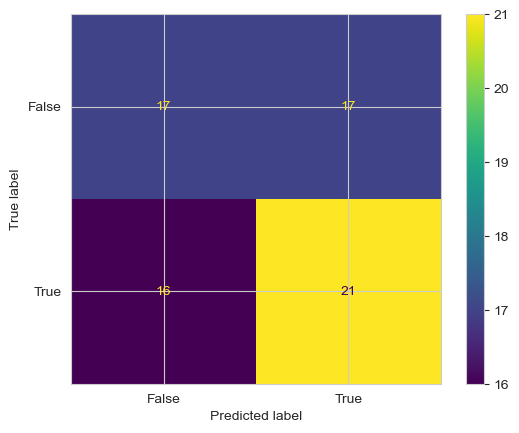

In [178]:
cm2 = confusion_matrix(y2_test, pred2, labels=lr2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=lr2.classes_)
disp2.plot()
plt.show()

Logistic Regression on both

In [179]:
lr3 = LogisticRegression()
X3_train = final_df_train[["Team_A_eco_rating", "Team_B_eco_rating", "Team_A_rating", "Team_B_rating"]]
y3_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X3_test = final_df_test[["Team_A_eco_rating", "Team_B_eco_rating", "Team_A_rating", "Team_B_rating"]]
y3_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)

In [180]:
print(len(X3_train), len(y3_train), len(X3_test), len(y3_test))

688 688 71 71


In [181]:
lr3.fit(X3_train, y3_train)
pred3 = lr3.predict(X3_test)
acc3 = accuracy_score(y3_test, pred3)
print("mean of true values:", np.mean(y3_test))
print("mean of prediction:", np.mean(pred3))
print("Accuracy:", acc3)
lr3.coef_

mean of true values: 0.5211267605633803
mean of prediction: 0.5070422535211268
Accuracy: 0.6197183098591549


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1.58111089, -1.34599768,  2.13926001, -2.36695718]])

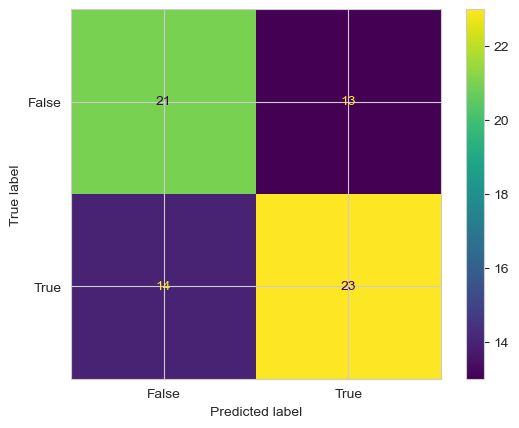

In [182]:
cm3 = confusion_matrix(y3_test, pred3, labels=lr3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=lr3.classes_)
disp3.plot()
plt.show()

In [183]:
print((29+22)/(29+22+17+15))

0.6144578313253012


In [184]:
lr4 = LogisticRegression()
X4_train = final_df_train[["Team_A_rating"]]
y4_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X4_test = final_df_test[["Team_A_rating"]]
y4_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)

In [185]:
lr4.fit(X4_train, y4_train)
pred4 = lr4.predict(X4_test)
acc4 = accuracy_score(y4_test, pred4)
print("mean of true values:", np.mean(y4_test))
print("mean of prediction:", np.mean(pred4))
print("Accuracy:", acc4)
lr4.coef_

mean of true values: 0.5211267605633803
mean of prediction: 0.8591549295774648
Accuracy: 0.5492957746478874


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3.73428721]])

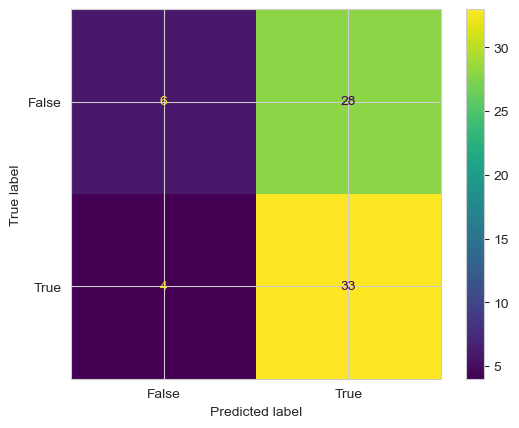

In [186]:
cm4 = confusion_matrix(y4_test, pred4, labels=lr4.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=lr4.classes_)
disp4.plot()
plt.show()